## Examine Role of Discretization

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.special import hermite

In [2]:
def read_eigen_file(filename):
    with open(filename) as f:
        data = f.readlines()

    # read number of discretization points
    npoints = int(data[0].split()[2])

    # get the x grid
    x_grid = np.array(data[1].split()[3:], dtype=float)
    
    # get eigenvalues and eigenvectors
    eigenvalues = np.zeros(npoints)
    eigenvectors = np.zeros((npoints, npoints))

    idx = 2
    for i in range(npoints):
        eigenvalues[i] = float(data[idx].split()[2])
        eigenvectors[i] = np.array(data[idx + 2].split(), dtype=float)
        idx += 3  # skip three rows

    return npoints, x_grid, eigenvalues, eigenvectors

In [3]:
def wavefunc(n, x):
    # coeff = 1 / (np.sqrt(2 ** n * math.factorial(n)) * np.pi ** (1/4))
    coeff = 1
    return coeff * np.exp(-x ** 2 / 2) * hermite(n)(x)

In [4]:
def analytical_energies(n):
    return n + 0.5

In [5]:
def get_max_eigenvector_error(n, x_grid, eigenvector):
    wavefunc_n = wavefunc(n, x_grid)
    wavefunc_n /= np.linalg.norm(wavefunc_n)
    
    # consider 2 parities
    max_error_1 = np.abs(eigenvector - wavefunc_n).max()
    max_error_2 = np.abs(eigenvector + wavefunc_n).max()
    
    return min(max_error_1, max_error_2)

In [6]:
plot_dir = f"..{os.sep}plots"

## Load Data

In [7]:
xmax_list = [2.5, 5, 10, 15]
num_xmax = len(xmax_list)

In [8]:
def get_errors(N, num_eigen):
    eigenvector_errors = np.zeros((num_xmax, num_eigen))
    eigenvalue_errors = np.zeros((num_xmax, num_eigen))

    exact_energies = analytical_energies(np.arange(num_eigen))

    for i, xmax in enumerate(xmax_list):
        output_filename = f"..{os.sep}data{os.sep}solution_{N}_{xmax}.txt"
        _, x_grid, eigenvalues, eigenvectors = read_eigen_file(output_filename)

        # compute eigenvalue error
        eigenvalue_errors[i] = np.abs((exact_energies - eigenvalues[:num_eigen]) / exact_energies)

        # compute eigenvector error
        for j in range(num_eigen):
            eigenvector_errors[i, j] = get_max_eigenvector_error(j, x_grid, eigenvectors[:, j])

    return eigenvector_errors, eigenvalue_errors

In [9]:
num_eigen = 1000
egvect_errors_1k, egval_errors_1k = get_errors(1000, num_eigen)
egvect_errors_5k, egval_errors_5k = get_errors(5000, num_eigen)

/Users/james.chryssanthacopoulos/src/quantum_info/assignment_4/env/lib/python3.10/site-packages/scipy/special/_orthogonal.py:1307: RuntimeWarning: overflow encountered in multiply
  hn = 2**n * _gam(n + 1) * sqrt(pi)
/Users/james.chryssanthacopoulos/src/quantum_info/assignment_4/env/lib/python3.10/site-packages/scipy/special/_orthogonal.py:132: RuntimeWarning: overflow encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
/var/folders/29/57ctygt16nb459fzj64lth0r0000gq/T/ipykernel_60032/2263544410.py:3: RuntimeWarning: invalid value encountered in divide
  wavefunc_n /= np.linalg.norm(wavefunc_n)
/Users/james.chryssanthacopoulos/src/quantum_info/assignment_4/env/lib/python3.10/site-packages/scipy/special/_orthogonal.py:119: RuntimeWarning: invalid value encountered in double_scalars
  equiv_weights = [weights[k] / wfunc(roots[k]) for


## Eigenvector Errors

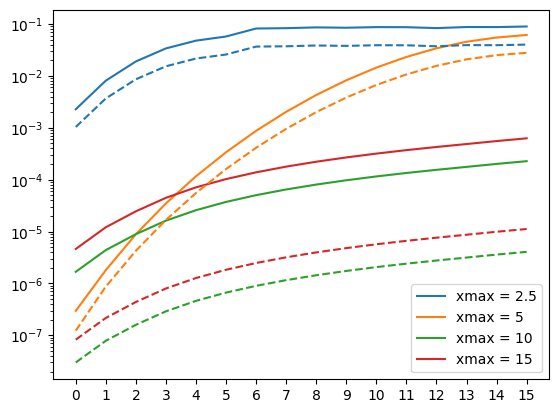

In [10]:
num_to_plot = 16
eigenvector_num = range(num_to_plot)
plt.plot(eigenvector_num, egvect_errors_1k[0, :num_to_plot], "C0", label="xmax = 2.5")
plt.plot(eigenvector_num, egvect_errors_1k[1, :num_to_plot], "C1", label="xmax = 5")
plt.plot(eigenvector_num, egvect_errors_1k[2, :num_to_plot], "C2", label="xmax = 10")
plt.plot(eigenvector_num, egvect_errors_1k[3, :num_to_plot], "C3", label="xmax = 15")
plt.plot(eigenvector_num, egvect_errors_5k[0, :num_to_plot], "C0--")
plt.plot(eigenvector_num, egvect_errors_5k[1, :num_to_plot], "C1--")
plt.plot(eigenvector_num, egvect_errors_5k[2, :num_to_plot], "C2--")
plt.plot(eigenvector_num, egvect_errors_5k[3, :num_to_plot], "C3--")
plt.xticks(eigenvector_num)
plt.yscale("log")
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}eigenfunction_error_xranges.pdf", format="pdf", bbox_inches="tight")

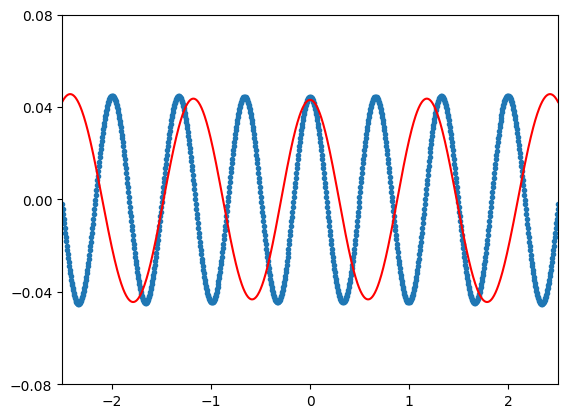

In [11]:
output_filename = f"..{os.sep}data{os.sep}solution_1000_2.5.txt"
_, x_grid, eigenvalues, eigenvectors = read_eigen_file(output_filename)

wavefunc_14 = -wavefunc(14, x_grid)
wavefunc_14 /= np.linalg.norm(wavefunc_14)

plt.plot(x_grid, eigenvectors[:, 14], '.', label="Numerical")
plt.plot(x_grid, wavefunc_14, 'r', label="Analytical")
plt.xlim([x_grid[0], x_grid[-1]])
plt.ylim([-0.08, 0.08])
plt.yticks([-0.08, -0.04, 0, 0.04, 0.08])
plt.savefig(f"{plot_dir}{os.sep}eigenfunction_15_xmax_2.5.pdf", format="pdf", bbox_inches="tight")

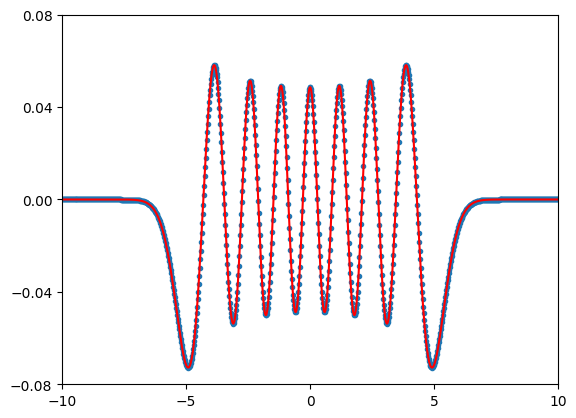

In [12]:
output_filename = f"..{os.sep}data{os.sep}solution_1000_10.txt"
_, x_grid, eigenvalues, eigenvectors = read_eigen_file(output_filename)

wavefunc_14 = -wavefunc(14, x_grid)
wavefunc_14 /= np.linalg.norm(wavefunc_14)

plt.plot(x_grid, eigenvectors[:, 14], '.', label="Numerical")
plt.plot(x_grid, wavefunc_14, 'r', label="Analytical")
plt.xlim([x_grid[0], x_grid[-1]])
plt.xticks([-10, -5, 0, 5, 10])
plt.yticks([-0.08, -0.04, 0, 0.04, 0.08])
plt.ylim([-0.08, 0.08])
plt.savefig(f"{plot_dir}{os.sep}eigenfunction_15_xmax_10.pdf", format="pdf", bbox_inches="tight")

## Eigenvalue Errors

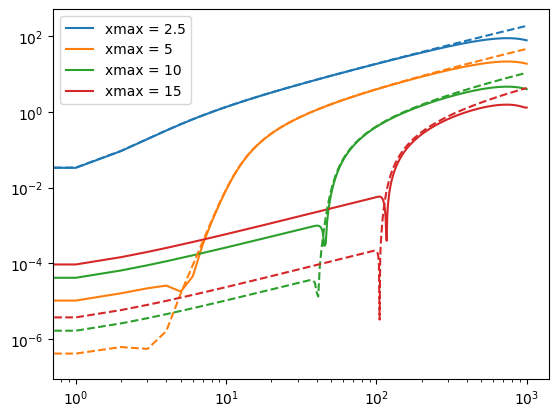

In [13]:
plt.loglog(range(num_eigen), egval_errors_1k[0], "C0", label="xmax = 2.5")
plt.loglog(range(num_eigen), egval_errors_1k[1], "C1", label="xmax = 5")
plt.loglog(range(num_eigen), egval_errors_1k[2], "C2", label="xmax = 10")
plt.loglog(range(num_eigen), egval_errors_1k[3], "C3", label="xmax = 15")
plt.loglog(range(num_eigen), egval_errors_5k[0], "C0--")
plt.loglog(range(num_eigen), egval_errors_5k[1], "C1--")
plt.loglog(range(num_eigen), egval_errors_5k[2], "C2--")
plt.loglog(range(num_eigen), egval_errors_5k[3], "C3--")
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}eigenvalue_error_xranges.pdf", format="pdf", bbox_inches="tight")